Loan Approval Prediction Model

In [ ]:
import pandas as pd
import numpy as np

#loading our dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Grad/financial_lending.csv')


In [ ]:
df.head(10)

,application_id,applicant_gender,is_married,num_dependents,education_level,is_self_employed,primary_income,secondary_income,loan_amount_requested,term_duration_months,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#dropping 'Unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         614 non-null    object 
 1   applicant_gender       601 non-null    object 
 2   is_married             611 non-null    object 
 3   num_dependents         599 non-null    object 
 4   education_level        614 non-null    object 
 5   is_self_employed       582 non-null    object 
 6   primary_income         614 non-null    int64  
 7   secondary_income       614 non-null    float64
 8   loan_amount_requested  592 non-null    float64
 9   term_duration_months   600 non-null    float64
 10  has_credit_history     564 non-null    float64
 11  residence_area         614 non-null    object 
 12  approval_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
application_id,0
applicant_gender,13
is_married,3
num_dependents,15
education_level,0
is_self_employed,32
primary_income,0
secondary_income,0
loan_amount_requested,22
term_duration_months,14


In [ ]:
#Identify columns with missing values
missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0].index.tolist()

print("Columns with missing values:", missing_cols)

categorical_missing_cols = []
numerical_missing_cols = []

for col in missing_cols:
    if df[col].dtype == 'object':
        categorical_missing_cols.append(col)
    else:
        numerical_missing_cols.append(col)

# fill categorical columns with mode
for col in categorical_missing_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
    print(f"Filled missing values in '{col}' with mode: {df[col].mode()[0]}")

#filling numerical columns with median
for col in numerical_missing_cols:
    df[col].fillna(df[col].median(), inplace=True)
    print(f"Filled missing values in '{col}' with median: {df[col].median()}")



Columns with missing values: ['applicant_gender', 'is_married', 'num_dependents', 'is_self_employed', 'loan_amount_requested', 'term_duration_months', 'has_credit_history']
Filled missing values in 'applicant_gender' with mode: Male
Filled missing values in 'is_married' with mode: Yes
Filled missing values in 'num_dependents' with mode: 0
Filled missing values in 'is_self_employed' with mode: No
Filled missing values in 'loan_amount_requested' with median: 128.0
Filled missing values in 'term_duration_months' with median: 360.0
Filled missing values in 'has_credit_history' with median: 1.0


/tmp/ipython-input-55-3498807119.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-55-3498807119.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
print(df.isnull().sum())

application_id           0
applicant_gender         0
is_married               0
num_dependents           0
education_level          0
is_self_employed         0
primary_income           0
secondary_income         0
loan_amount_requested    0
term_duration_months     0
has_credit_history       0
residence_area           0
approval_status          0
dtype: int64


In [ ]:
df.describe()

,primary_income,secondary_income,loan_amount_requested,term_duration_months,has_credit_history
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         614 non-null    object 
 1   applicant_gender       614 non-null    object 
 2   is_married             614 non-null    object 
 3   num_dependents         614 non-null    object 
 4   education_level        614 non-null    object 
 5   is_self_employed       614 non-null    object 
 6   primary_income         614 non-null    int64  
 7   secondary_income       614 non-null    float64
 8   loan_amount_requested  614 non-null    float64
 9   term_duration_months   614 non-null    float64
 10  has_credit_history     614 non-null    float64
 11  residence_area         614 non-null    object 
 12  approval_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

#list of categorical columns to encode (excluding the target 'approval_status' for now)
#the 'num_dependents' fetures in our datset is treated as categorical because it's 'object' dtype with '3+'
categorical_cols_for_le = [
    'applicant_gender',
    'is_married',
    'num_dependents',
    'education_level',
    'is_self_employed',
    'residence_area'
]

le = LabelEncoder()

#Apply LabelEncoder to each specified categorical column
for col in categorical_cols_for_le:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded column: '{col}'")

#encoding the target variable 'approval_status'
df['approval_status'] = df['approval_status'].map({'Y': 1, 'N': 0})

Encoded column: 'applicant_gender'
Encoded column: 'is_married'
Encoded column: 'num_dependents'
Encoded column: 'education_level'
Encoded column: 'is_self_employed'
Encoded column: 'residence_area'


In [ ]:
print("\nDataFrame Head after Categorical Encoding:")
print(df.head(3))


DataFrame Head after Categorical Encoding:
  application_id  applicant_gender  is_married  num_dependents  \
0       LP001002                 1           0               0   
1       LP001003                 1           1               1   
2       LP001005                 1           1               0   

   education_level  is_self_employed  primary_income  secondary_income  \
0                0                 0            5849               0.0   
1                0                 0            4583            1508.0   
2                0                 1            3000               0.0   

   loan_amount_requested  term_duration_months  has_credit_history  \
0                  128.0                 360.0                 1.0   
1                  128.0                 360.0                 1.0   
2                   66.0                 360.0                 1.0   

   residence_area  approval_status  
0               2                1  
1               0                0  
2 

In [ ]:
print(df.describe())

       applicant_gender  is_married  num_dependents  education_level  \
count        614.000000  614.000000      614.000000       614.000000   
mean           0.817590    0.653094        0.744300         0.218241   
std            0.386497    0.476373        1.009623         0.413389   
min            0.000000    0.000000        0.000000         0.000000   
25%            1.000000    0.000000        0.000000         0.000000   
50%            1.000000    1.000000        0.000000         0.000000   
75%            1.000000    1.000000        1.000000         0.000000   
max            1.000000    1.000000        3.000000         1.000000   

       is_self_employed  primary_income  secondary_income  \
count        614.000000      614.000000        614.000000   
mean           0.133550     5403.459283       1621.245798   
std            0.340446     6109.041673       2926.248369   
min            0.000000      150.000000          0.000000   
25%            0.000000     2877.500000       

In [ ]:
# Histograms
numerical_cols_for_hist = [
    'primary_income',
    'secondary_income',
    'loan_amount_requested',
    'term_duration_months'
]
existing_numerical_cols = [col for col in numerical_cols_for_hist if col in df.columns]


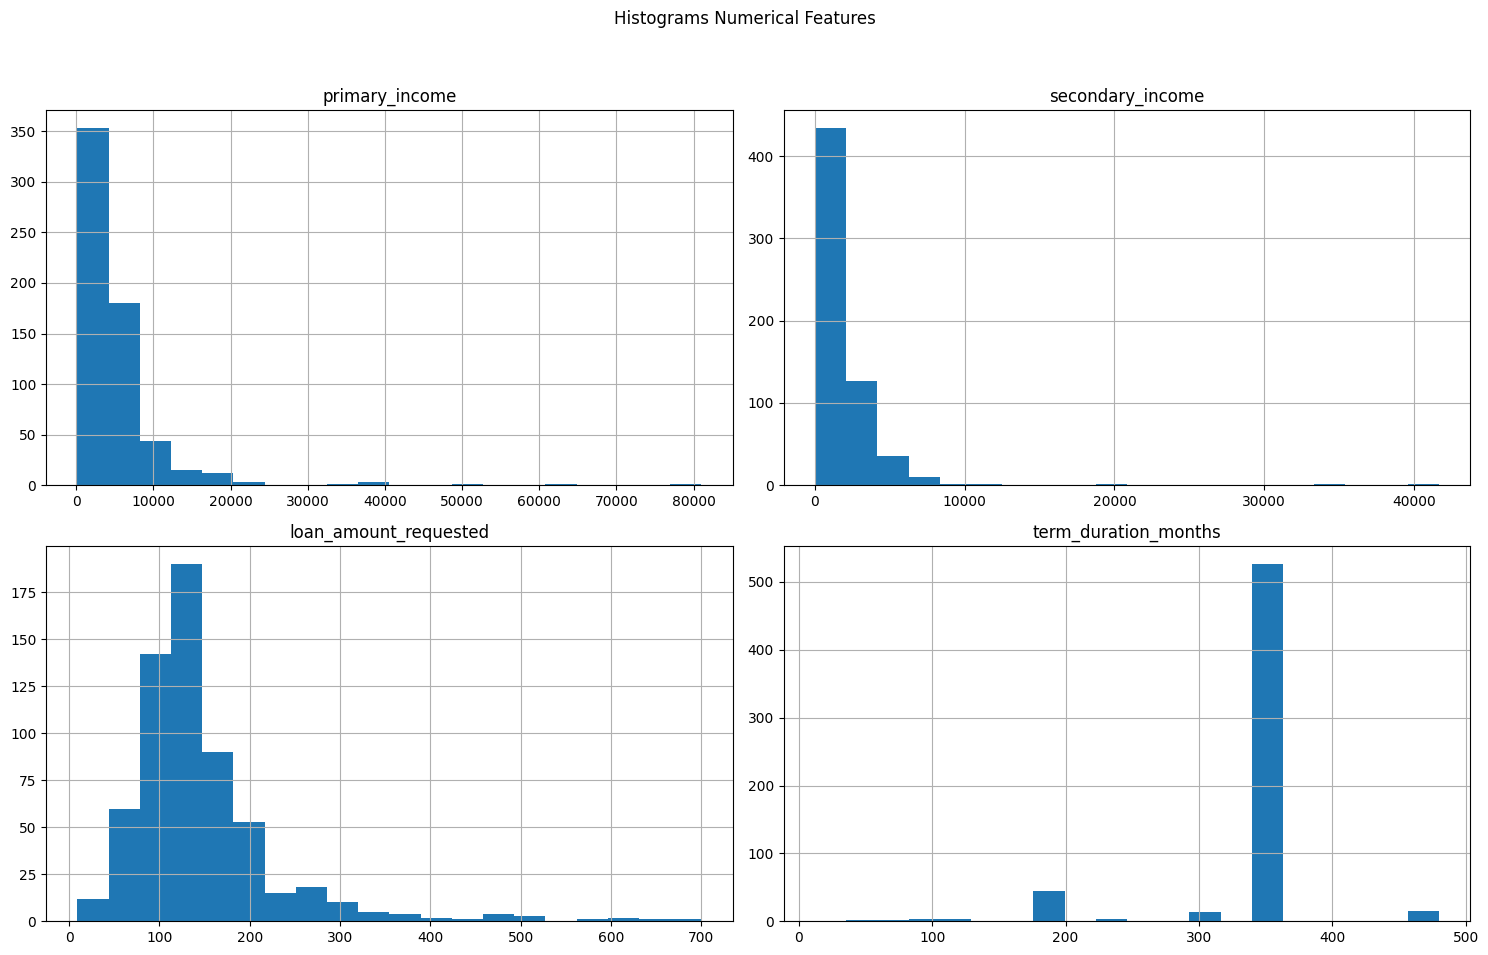

In [ ]:
import matplotlib.pyplot as plt
if existing_numerical_cols:
    df[existing_numerical_cols].hist(bins=20, figsize=(15, 10))
    plt.suptitle('Histograms Numerical Features')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

primary_income, secondary_income, and loan_amount_requested are all heavily right-skewed, meaning most applicants have lower incomes and request smaller loans, with a few individuals having very high values. This skewness is common in financial data.


term_duration_months shows a distinct peak at 360 months, indicating that a
30-year loan term is by far the most common.

Applying  a logarithmic transformation (specifically np.log1p) to primary_income, secondary_income, and loan_amount_requested.

In [ ]:
#Apply Log Transformation to Skewed Numerical Features
skewed_features = ['primary_income', 'secondary_income', 'loan_amount_requested']
for feature in skewed_features:
    df[feature] = np.log1p(df[feature])
print(f"Applied np.log1p to: {skewed_features}")

Applied np.log1p to: ['primary_income', 'secondary_income', 'loan_amount_requested']


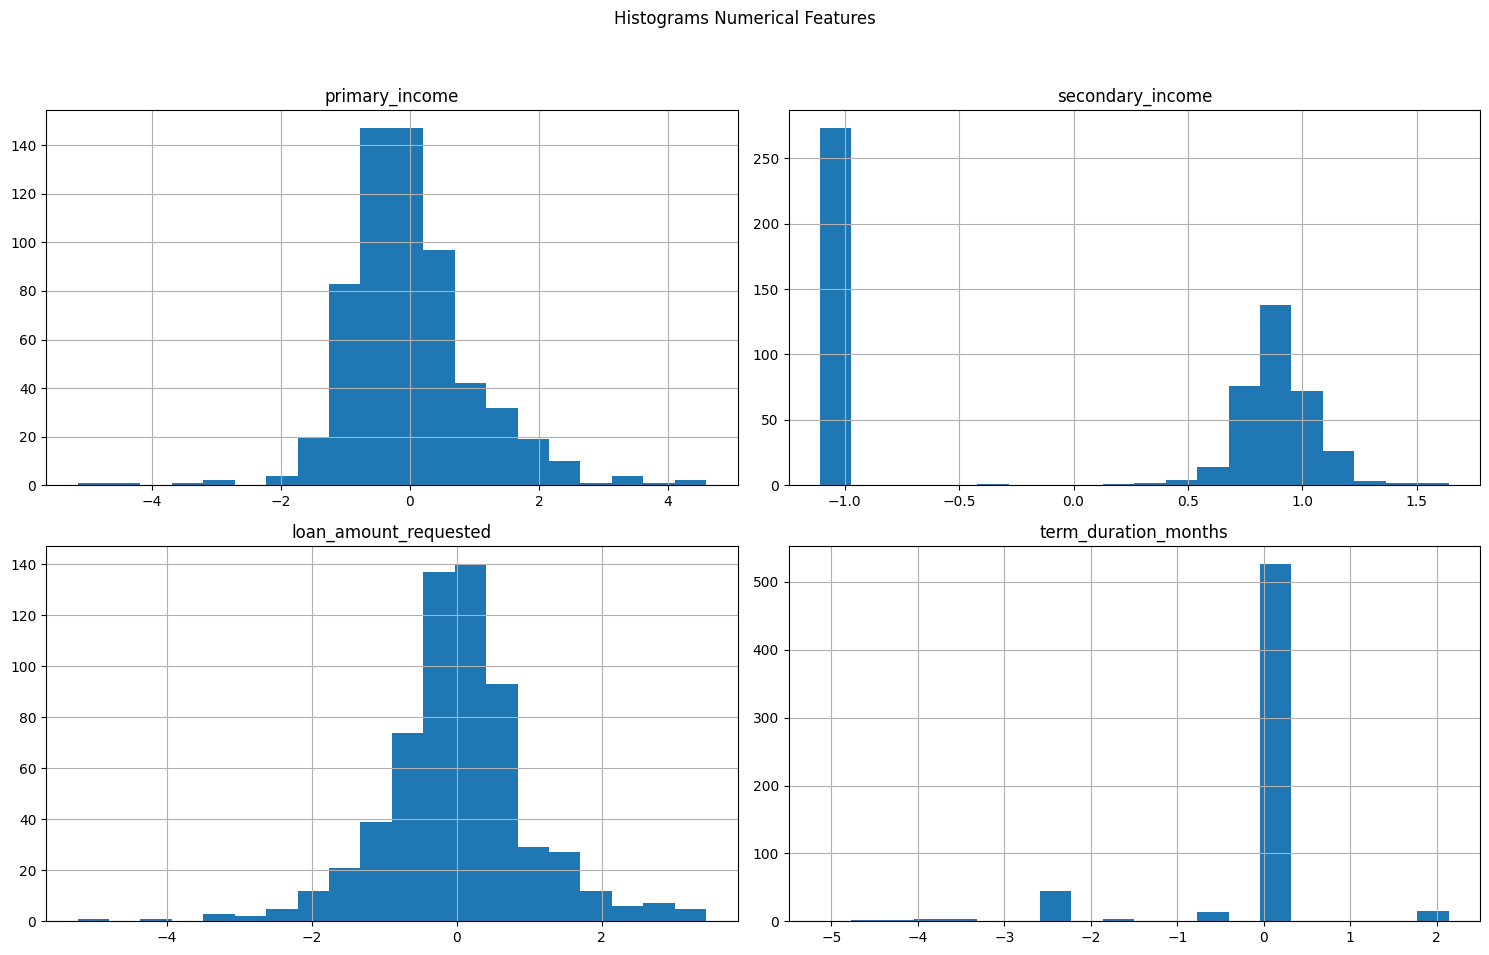

In [80]:
# After the Log Transformation

import matplotlib.pyplot as plt
if existing_numerical_cols:
    df[existing_numerical_cols].hist(bins=20, figsize=(15, 10))
    plt.suptitle('Histograms Numerical Features')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
# Count Plots for Categorical Features
categorical_cols_for_count = [
    'applicant_gender',
    'is_married',
    'num_dependents',
    'education_level',
    'is_self_employed',
    'residence_area',
    'has_credit_history',
    'approval_status'
]
existing_categorical_cols = [col for col in categorical_cols_for_count if col in df.columns]


/tmp/ipython-input-67-3497003072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-67-3497003072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-67-3497003072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-67-3497003072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

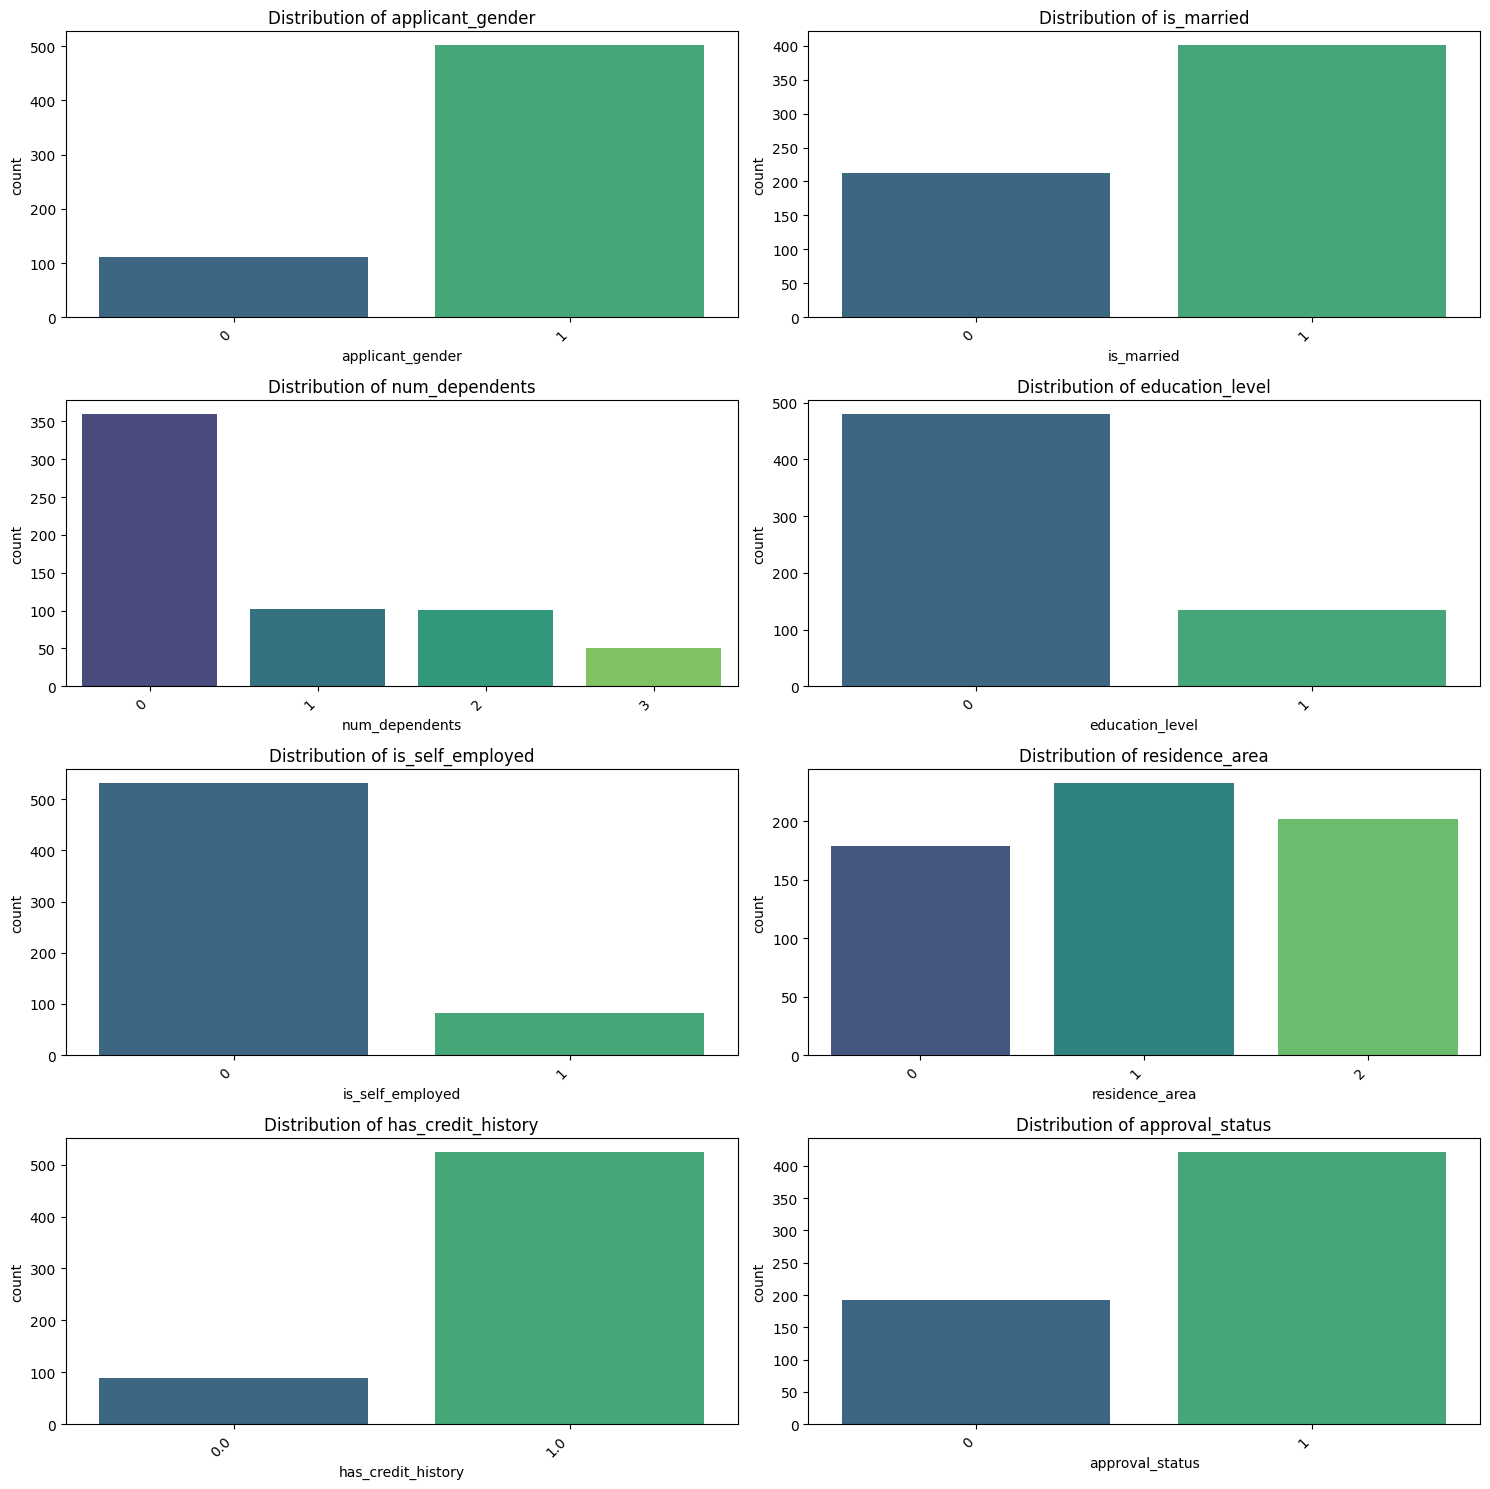

In [ ]:
import seaborn as sns
if existing_categorical_cols:
    plt.figure(figsize=(15, 15))
    for i, col in enumerate(existing_categorical_cols):
        plt.subplot(4, 2, i + 1)
        sns.countplot(data=df, x=col, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found for count plots.")


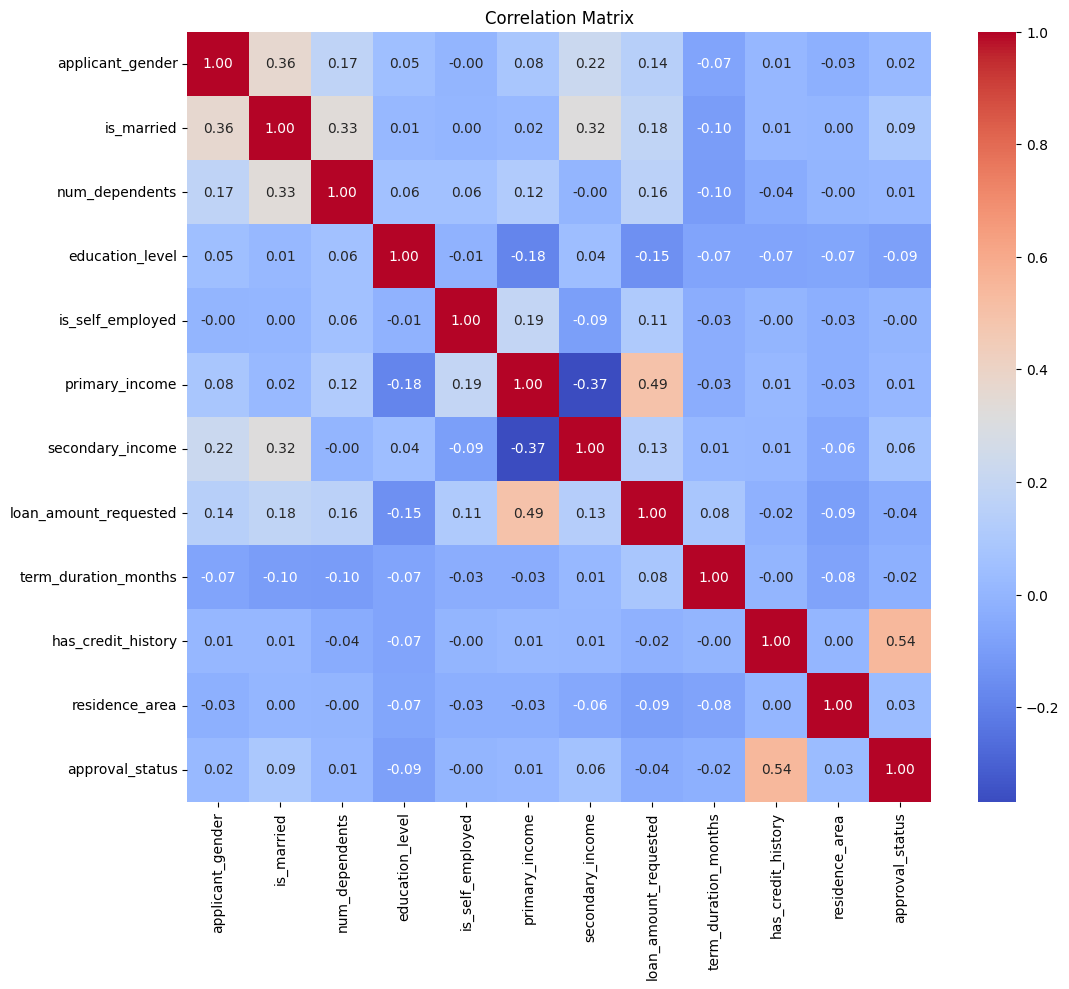

In [ ]:
# Correlation Heatmap
df_for_corr = df.drop('application_id', axis=1, errors='ignore')
plt.figure(figsize=(12, 10))
sns.heatmap(df_for_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**has_credit_history**
 stands out as the most important feature influencing loan approval.

 As we can see that the value is 0.54 correspoding to **approval_status**


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = [
    'primary_income',
    'secondary_income',
    'loan_amount_requested',
    'term_duration_months',
    'has_credit_history'
]

scaler = StandardScaler()

#Apply StandardScaler to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("DataFrame Head after Numerical Feature Scaling:")
print(df.head(3))

print("\nDescriptive Statistics for Scaled Numerical Columns (check mean close to 0, std close to 1):")
print(df[numerical_cols].describe())

DataFrame Head after Numerical Feature Scaling:
  application_id  applicant_gender  is_married  num_dependents  \
0       LP001002                 1           0               0   
1       LP001003                 1           1               1   
2       LP001005                 1           1               0   

   education_level  is_self_employed  primary_income  secondary_income  \
0                0                 0        0.516186         -1.107783   
1                0                 0        0.137806          0.782158   
2                0                 1       -0.519479         -1.107783   

   loan_amount_requested  term_duration_months  has_credit_history  \
0              -0.012803              0.273231            0.411733   
1              -0.012803              0.273231            0.411733   
2              -1.348663              0.273231            0.411733   

   residence_area  approval_status  
0               2                1  
1               0                0 

In [ ]:
#Train-Test Split
X = df.drop(['application_id', 'approval_status'], axis=1)
y = df['approval_status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nTrain-Test Split complete:")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Train-Test Split complete:
Shape of X_train: (491, 11)
Shape of X_test: (123, 11)
Shape of y_train: (491,)
Shape of y_test: (123,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

print("Training Logistic Regression Model")

#increased max_iter to 1000 for convergence stability
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

#predict on the test set
y_pred_lr = lr_model.predict(X_test)

#evaluating our Logistic Regression model
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n",confusion_matrix(y_test, y_pred_lr))

Training Logistic Regression Model
Accuracy: 0.8536585365853658

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


Confusion Matrix:
 [[21 17]
 [ 1 84]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Training Decision Tree Classifier")

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# Evaluating the Decision Tree model
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Training Decision Tree Classifier
Accuracy: 0.7642276422764228

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.61      0.61        38
           1       0.83      0.84      0.83        85

    accuracy                           0.76       123
   macro avg       0.72      0.72      0.72       123
weighted avg       0.76      0.76      0.76       123


Confusion Matrix:
 [[23 15]
 [14 71]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Training Random Forest Classifier")

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

#Evaluate the Random Forest model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Training Random Forest Classifier
Accuracy: 0.8292682926829268

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.63      0.70        38
           1       0.85      0.92      0.88        85

    accuracy                           0.83       123
   macro avg       0.81      0.77      0.79       123
weighted avg       0.83      0.83      0.82       123


Confusion Matrix:
 [[24 14]
 [ 7 78]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Training Gradient Boosting Classifier")

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Training Gradient Boosting Classifier
Accuracy: 0.7967479674796748

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.53      0.62        38
           1       0.81      0.92      0.86        85

    accuracy                           0.80       123
   macro avg       0.78      0.72      0.74       123
weighted avg       0.79      0.80      0.79       123


Confusion Matrix:
 [[20 18]
 [ 7 78]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Performing Hyperparameter Tuning for Logistic Regression")

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

print("\nBest parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_lr_model = grid_search.best_estimator_

y_pred_tuned_lr = best_lr_model.predict(X_test)

print("\n Tuned Logistic Regression Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned_lr))

Performing Hyperparameter Tuning for Logistic Regression

Best parameters found: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.7983714698000413

 Tuned Logistic Regression Model Evaluation ---
Accuracy: 0.8536585365853658

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


Confusion Matrix:
 [[21 17]
 [ 1 84]]


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

In [81]:
print("Performing Hyperparameter Tuning for Random Forest Classifier")

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

grid_search_rf.fit(X_train, y_train)

print("\nBest parameters found for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)

best_rf_model = grid_search_rf.best_estimator_

y_pred_tuned_rf = best_rf_model.predict(X_test)

print("\n--- Tuned Random Forest Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned_rf))


Performing Hyperparameter Tuning for Random Forest Classifier

Best parameters found for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.7963512677798392

--- Tuned Random Forest Model Evaluation ---
Accuracy: 0.8536585365853658

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.61      0.72        38
           1       0.85      0.96      0.90        85

    accuracy                           0.85       123
   macro avg       0.86      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123


Confusion Matrix:
 [[23 15]
 [ 3 82]]


In [83]:
print("Random Forest Feature Importances")
feature_importances_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances_rf)

Random Forest Feature Importances
                  Feature  Importance
9      has_credit_history    0.326254
5          primary_income    0.186013
7   loan_amount_requested    0.172098
6        secondary_income    0.108543
10         residence_area    0.049902
2          num_dependents    0.045828
8    term_duration_months    0.036884
1              is_married    0.023517
3         education_level    0.022644
0        applicant_gender    0.014232
4        is_self_employed    0.014087


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:02:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Evaluation
Accuracy: 0.8292682926829268

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72        38
           1       0.87      0.88      0.88        85

    accuracy                           0.83       123
   macro avg       0.80      0.80      0.80       123
weighted avg       0.83      0.83      0.83       123


Confusion Matrix:
 [[27 11]
 [10 75]]


In [ ]:
print("Performing Hyperparameter Tuning for XGBoost Classifier")

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

grid_search_xgb = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

grid_search_xgb.fit(X_train, y_train)

print("\nBest parameters found for XGBoost:", grid_search_xgb.best_params_)
print("Best cross-validation accuracy for XGBoost:", grid_search_xgb.best_score_)

best_xgb_model = grid_search_xgb.best_estimator_

y_pred_tuned_xgb = best_xgb_model.predict(X_test)

print("Tuned XGBoost Model Evaluation")
print("Accuracy:",accuracy_score(y_test, y_pred_tuned_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned_xgb))

Performing Hyperparameter Tuning for XGBoost Classifier

Best parameters found for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best cross-validation accuracy for XGBoost: 0.7962990672851514
Tuned XGBoost Model Evaluation
Accuracy: 0.8617886178861789

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123


Confusion Matrix:
 [[22 16]
 [ 1 84]]


In [ ]:
feature_importances_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances_rf)

                  Feature  Importance
9      has_credit_history    0.415240
4        is_self_employed    0.069971
10         residence_area    0.066096
3         education_level    0.064975
1              is_married    0.064387
5          primary_income    0.063610
6        secondary_income    0.062682
7   loan_amount_requested    0.061809
8    term_duration_months    0.057817
2          num_dependents    0.045904
0        applicant_gender    0.027509
